**annoy: intro**

Nearest Neighbors in Python with Annoy

In [5]:
pip install annoy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552452 sha256=43c6d50490a2cdc5b7384d6b1b8aa62eb3d2ffe2d77e99de7c73f8242e81d433
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


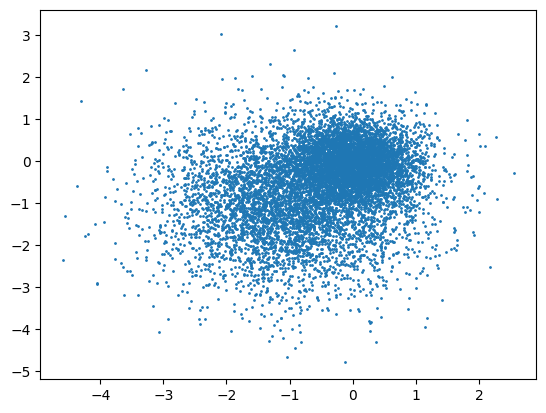

In [6]:
import numpy as np
import matplotlib.pylab as plt
from annoy import AnnoyIndex

columns = 2

vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)),
    np.random.normal(0, 0.5, (5000, columns)),
])

plt.scatter(vecs[:, 0], vecs[:, 1], s=1);


This code generates the annoy index.

In [7]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)


True

code fetches the indices of the neighbors;

In [8]:
indices = annoy.get_nns_by_vector(np.array([0., 0.]), 20)


Plotting Annoy query results with Matplotlib

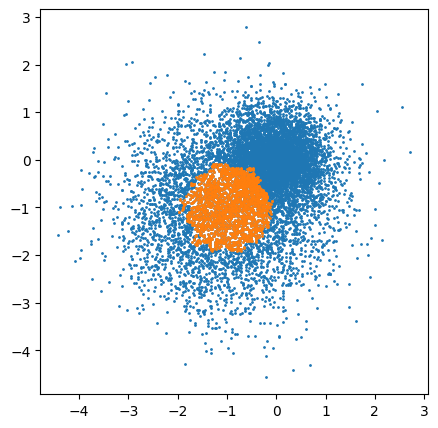

In [9]:
import numpy as np
import matplotlib.pylab as plt
from annoy import AnnoyIndex

columns = 2

vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)),
    np.random.normal(0, 0.5, (5000, columns)),
])

annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)

plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1);

indices = annoy.get_nns_by_vector(np.array([-1., -1.]), 2000)

subset = vecs[indices, :]
plt.scatter(subset[:, 0], subset[:, 1], s=1);


Tuning the Accuracy in Annoy

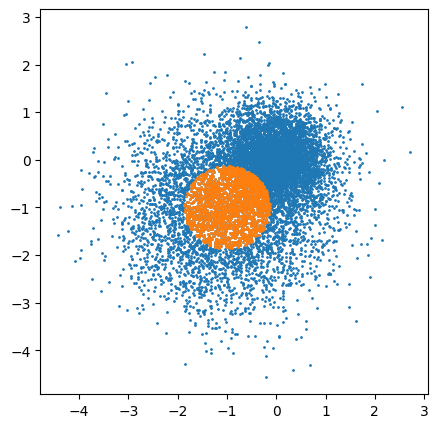

In [10]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
# this is the line that we changed from 1 -> 10
annoy.build(n_trees=10)

plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1);

indices = annoy.get_nns_by_vector(np.array([-1., -1.]), 2000)

subset = vecs[indices, :]
# this should now show a proper circle
plt.scatter(subset[:, 0], subset[:, 1], s=1);


Benchmark Annoy Performance against Scikit-Learn

In [11]:
from sklearn.neighbors import NearestNeighbors

# this is the original query
query = np.array([-2., -2.])
# scikit learn needs it to be wrapped
q = np.array([query])
# we will retreive 10 neighbors in each case
n = 10


Scikit-Learn Balltree

In [12]:
nn = NearestNeighbors(n_neighbors=n, algorithm='ball_tree').fit(vecs)


In [13]:
%%timeit
distances, indices = nn.kneighbors(q)


317 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Scikit-Learn KD-tree

In [14]:
nn = NearestNeighbors(n_neighbors=n, algorithm='kd_tree').fit(vecs)


In [15]:
%%timeit
distances, indices = nn.kneighbors(q)


425 µs ± 77.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Scikit-Learn Brute Force

In [16]:
nn = NearestNeighbors(n_neighbors=n, algorithm='brute').fit(vecs)


In [17]:
%%timeit
distances, indices = nn.kneighbors(q)


778 µs ± 27.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Annoy with 10 trees

In [18]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=10)


True

In [19]:
%%timeit
annoy.get_nns_by_vector(query, n)


13.4 µs ± 2.95 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Annoy with 1 tree

In [20]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)


True

In [21]:
%%timeit
annoy.get_nns_by_vector(query, n)


2.78 µs ± 55.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Extra Features of Annoy

If you want to save and load from disk you can use this code

In [22]:
columns = 2
vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)),
    np.random.normal(0, 0.5, (5000, columns)),
])

metric = 'euclidean'

annoy = AnnoyIndex(columns, metric)
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)

# here we save the annoy index
annoy.save('test.ann')

# next we make a new object with the same settings
annoy_from_disk = AnnoyIndex(columns, metric)
# here we load it in again
annoy_from_disk.load('test.ann')


True

**lambda: introduction**

Lambda functions are just functions but typically very simple ones. It's the fact that makes them really easy to declare that makes them extremely expressive as well and in this series of videos we'd like to demonstrate not just how they work but also why they're nice to reason about.

In [23]:
def double(x):
    return x * 2

double(3)


6

In [24]:
triple = lambda x: x * 3
triple(3)


9

lambda: functions

In [25]:
def double(x):
    return x * 2

def add_one(x):
    return x + 1


In [26]:
function_list = [double, add_one]


In [27]:
number = 1
for func in [add_one, double, add_one]:
    number = func(number)
    print(number)


2
4
5


In [28]:
number = 1
for func in [lambda x: x - 1, lambda x: x * 2, lambda x: x + 2]:
    number = func(number)
    print(number)


0
0
2


The functools library contains many items that allow you to make the most out of lambda functions. A common example is the reduce function. We'll show a demonstration below.

In [29]:
from functools import reduce

numbers = [1, 2, 3, 4, 5]

# sum via reduce
reduce(lambda x, y: x + y, numbers)
# prod via reduce
reduce(lambda x, y: x * y, numbers)


120

Note that again here the loc tells us what we're going to be taking a subset of the original dataframe while the lambda function tell us how we're going to select which rows can stay.

In [30]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.normal(0, 1, (10, 2)))
df.columns = ['column_a', 'column_b']
df.loc[lambda d: d['column_b'] > 0]


,column_a,column_b
1,0.342917,1.429431
5,0.264710,0.006298
7,0.146089,0.165288
8,-0.000697,0.201844
